<a href="https://colab.research.google.com/github/SunaUezuri/ElectricalEnergyConsumption/blob/main/ElectricalEnergyConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages Imports**

In [1]:
import pandas as pd

# **Creation of the Dataframe**

In [3]:
# sep ----> Standard: ','
# low_memory ----> Standard: True -----> False | used when the archive has high data

df =  pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)

# **Exploratory Data Analysis**

In [4]:
df.shape
print(f'The dataframe has {df.shape[0]} registries and {df.shape[1]} attributes')

The dataframe has 2075259 registries and 9 attributes


In [5]:
# Showing the first 10 registries
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## **Global_active_power and Global_reactive_power**

**Global_active_power** = É a potência que é consumida e transformada em trabalho útil como:

*   Iluminar uma lâmpada
*   Aquecer uma resistência
*   Girar um motor de máquina

-------


**Global_reactive_power** = Ela não realiza trabalho útil diretamente, É a potência que oscila entre a fonte e a carga devido a campos magnéticos (indutores, motores, transformadores) ou elétricos (capacitores), Embora não produza trabalho, é necessária para manter o funcionamento de dispositivos eletromagnéticos (motores, bobinas, transformadores).





In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [7]:
# Quantificar registros ausentes (NaN e/ou nulos)
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [8]:
perc = 100 * (25979 / df.shape[0])

print(f'O percentual de registros ausentes é de {perc:.3f}%')

O percentual de registros ausentes é de 1.252%


In [9]:
# Isolando as colunas que não quero tornar em numéricos
colunas_excluir = ["Date", "Time"]

# Converter todas as outras colunas para numérico
for col in df.columns:
    if col not in colunas_excluir:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [11]:
# Convertendo a coluna data para datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")

In [12]:
# Converter Time de string para timedelta
df["Time"] = pd.to_timedelta(df["Time"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   Date                   datetime64[ns] 
 1   Time                   timedelta64[ns]
 2   Global_active_power    float64        
 3   Global_reactive_power  float64        
 4   Voltage                float64        
 5   Global_intensity       float64        
 6   Sub_metering_1         float64        
 7   Sub_metering_2         float64        
 8   Sub_metering_3         float64        
dtypes: datetime64[ns](1), float64(7), timedelta64[ns](1)
memory usage: 142.5 MB


In [14]:
# Criando a nova coluna com o dia da semana correspondente
df["Dia_Semana"] = df["Date"].dt.day_name()

In [15]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Dia_Semana
0,2006-12-16,0 days 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday
1,2006-12-16,0 days 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday
2,2006-12-16,0 days 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday
3,2006-12-16,0 days 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday
4,2006-12-16,0 days 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday
5,2006-12-16,0 days 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,Saturday
6,2006-12-16,0 days 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,Saturday
7,2006-12-16,0 days 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,Saturday
8,2006-12-16,0 days 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,Saturday
9,2006-12-16,0 days 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0,Saturday


In [16]:
# Excluir registros ausentes
df = df.dropna()

In [18]:
# Quantificar registros ausentes (NaN e/ou nulos)
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
Dia_Semana,0


**Filtrando registros de 2007 e calculando a média de consumo diário**

In [19]:
# Filtrar apenas o ano de 2007
df_2007 = df[df["Date"].dt.year == 2007]

In [20]:
# Agrupar por dia e calcular a média diária
media_diaria = df_2007.groupby(df_2007["Date"].dt.date)["Global_active_power"].mean()

media_diaria

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2007-12-27,1.758471
2007-12-28,2.161842
2007-12-29,2.290942


### **Criando gráficos**

Utilizando o Seaborn para ver a variação da coluna Global_active_power em um dia

In [21]:
# imports
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
dia_escolhido = pd.to_datetime("01/02/2007")

# Filtrar o DataFrame para esse dia
df_dia = df[df["Date"].dt.date == dia_escolhido.date()]

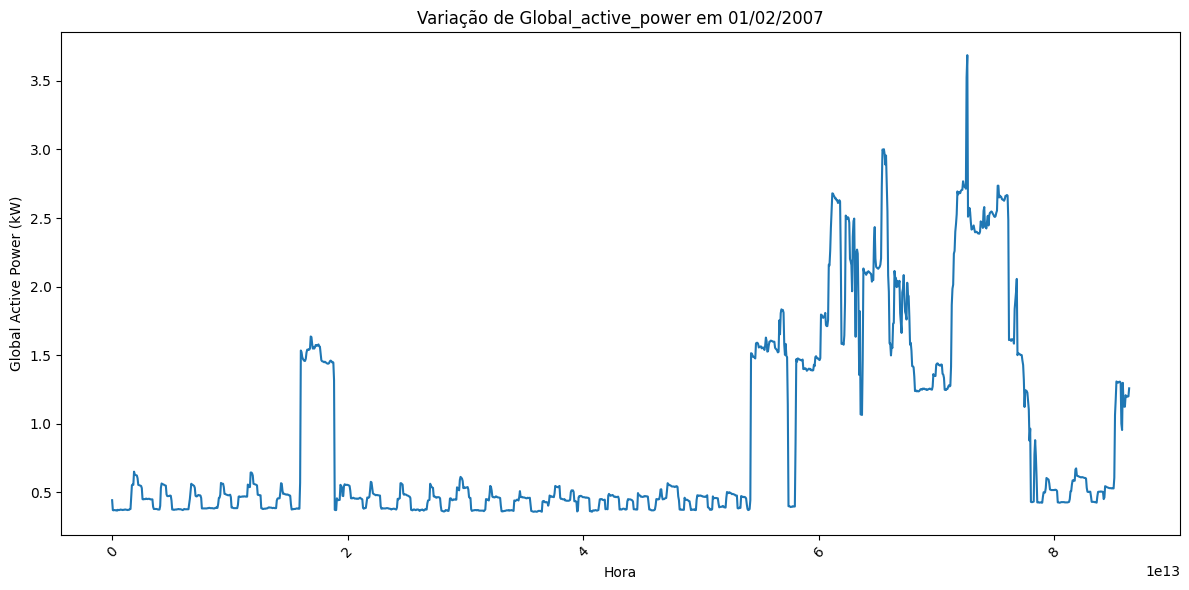

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_dia,
    x="Time",
    y="Global_active_power"
)

plt.xticks(rotation=45)  # Rotaciona os horários para melhor visualização
plt.title("Variação de Global_active_power em 01/02/2007")
plt.xlabel("Hora")
plt.ylabel("Global Active Power (kW)")
plt.tight_layout()
plt.show()

**Histograma de Voltage**

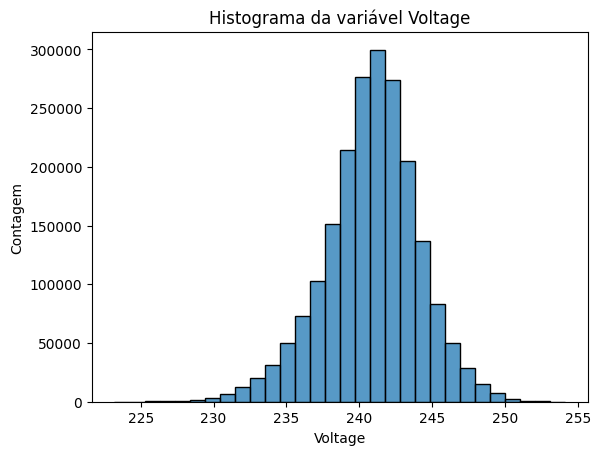

In [24]:
# Plotando o histograma
sns.histplot(data=df, x="Voltage", bins=30, kde=False)  # bins ajusta a quantidade de barras
plt.title("Histograma da variável Voltage")
plt.xlabel("Voltage")
plt.ylabel("Contagem")
plt.show()

<Axes: xlabel='Voltage', ylabel='Count'>

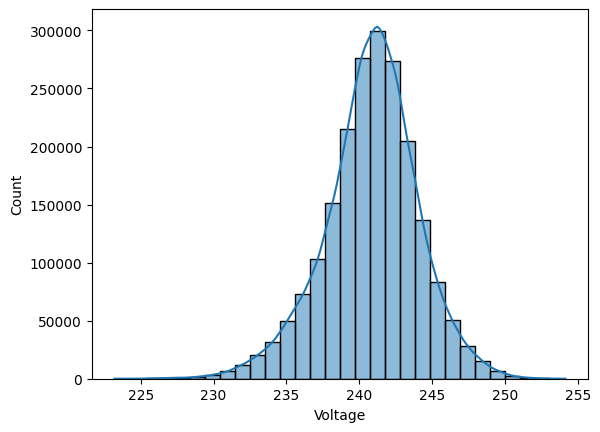

In [25]:
sns.histplot(data=df, x="Voltage", bins=30, kde=True)

O histograma indica que a tensão (Voltage) se mantém muito estável em torno de 240 V, com pouca variação, o que é típico de medições residenciais ou industriais com boa regulação.

**Calculando a média mensal do período**

In [26]:
media_mensal = df.groupby(df["Date"].dt.to_period("M"))["Global_active_power"].mean().reset_index()
media_mensal.rename(columns={"Global_active_power": "Media_Global_Active_Power"}, inplace=True)
print(media_mensal)

       Date  Media_Global_Active_Power
0   2006-12                   1.901295
1   2007-01                   1.546034
2   2007-02                   1.401084
3   2007-03                   1.318627
4   2007-04                   0.891189
5   2007-05                   0.985862
6   2007-06                   0.826814
7   2007-07                   0.667367
8   2007-08                   0.764186
9   2007-09                   0.969318
10  2007-10                   1.103911
11  2007-11                   1.294473
12  2007-12                   1.626474
13  2008-01                   1.459920
14  2008-02                   1.181384
15  2008-03                   1.245337
16  2008-04                   1.115972
17  2008-05                   1.024281
18  2008-06                   0.994096
19  2008-07                   0.794781
20  2008-08                   0.276488
21  2008-09                   0.987680
22  2008-10                   1.136768
23  2008-11                   1.387066
24  2008-12              

In [27]:
# Encontrado o dia com maior consumo ativo
consumo_diario = df.groupby(df["Date"].dt.date)["Global_active_power"].sum()

In [28]:
# Encontrando o dia com maior consumo
dia_max = consumo_diario.idxmax()
valor_max = consumo_diario.max()

print(f"O dia com maior consumo foi {dia_max} com {valor_max:.2f} kW")

O dia com maior consumo foi 2006-12-23 com 4773.39 kW


In [29]:
# weekday(): segunda=0, domingo=6
media_consumo = df.groupby(df['Date'].dt.weekday >= 5)['Global_active_power'].mean()

# Renomear índice para facilitar interpretação
media_consumo.index = ['Dias de semana', 'Finais de semana']

media_consumo

,Global_active_power
Dias de semana,1.035472
Finais de semana,1.234232


É possível notar que há mais gasto de energia durante o final de semana, provavelmente devido a muitas pessoas ficarem em casa durante estes dias.

## Calculando a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [30]:
# Calculando a correlação entre as variáveis
correlation_matrix = df[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]].corr()

# Exibindo a matriz de correlação
print(correlation_matrix)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


## Criando uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3

In [31]:
# Criando a nova variável somando as colunas de sub-medição
df["Total_Sub_metering"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]

## Verificando se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [32]:
# Calcular a média mensal de Total_Sub_metering
media_mensal_sub = df.groupby(df["Date"].dt.to_period("M"))["Total_Sub_metering"].mean().reset_index()
media_mensal_sub.rename(columns={"Total_Sub_metering": "Media_Total_Sub_metering"}, inplace=True)

# Calcular a média mensal de Global_active_power (already calculated in media_mensal)
# media_mensal is already available from previous execution

# Combinar as duas médias mensais para comparação
comparacao_mensal = pd.merge(media_mensal, media_mensal_sub, on="Date")

# Verificar se em algum mês a média de Total_Sub_metering ultrapassa a média de Global_active_power
meses_ultrapassam = comparacao_mensal[comparacao_mensal["Media_Total_Sub_metering"] > comparacao_mensal["Media_Global_Active_Power"]]

if not meses_ultrapassam.empty:
    print("Meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power:")
    print(meses_ultrapassam)
else:
    print("Não há meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power.")

Meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power:
       Date  Media_Global_Active_Power  Media_Total_Sub_metering
0   2006-12                   1.901295                 10.873181
1   2007-01                   1.546034                 10.423518
2   2007-02                   1.401084                  9.486135
3   2007-03                   1.318627                 10.212863
4   2007-04                   0.891189                  6.839375
5   2007-05                   0.985862                  8.452442
6   2007-06                   0.826814                  7.379151
7   2007-07                   0.667367                  5.697724
8   2007-08                   0.764186                  6.979336
9   2007-09                   0.969318                  8.206236
10  2007-10                   1.103911                  8.674493
11  2007-11                   1.294473                  9.819413
12  2007-12                   1.626474                 11.636551
13  

## Gráfico de série temporal do Voltage para o ano de 2008.

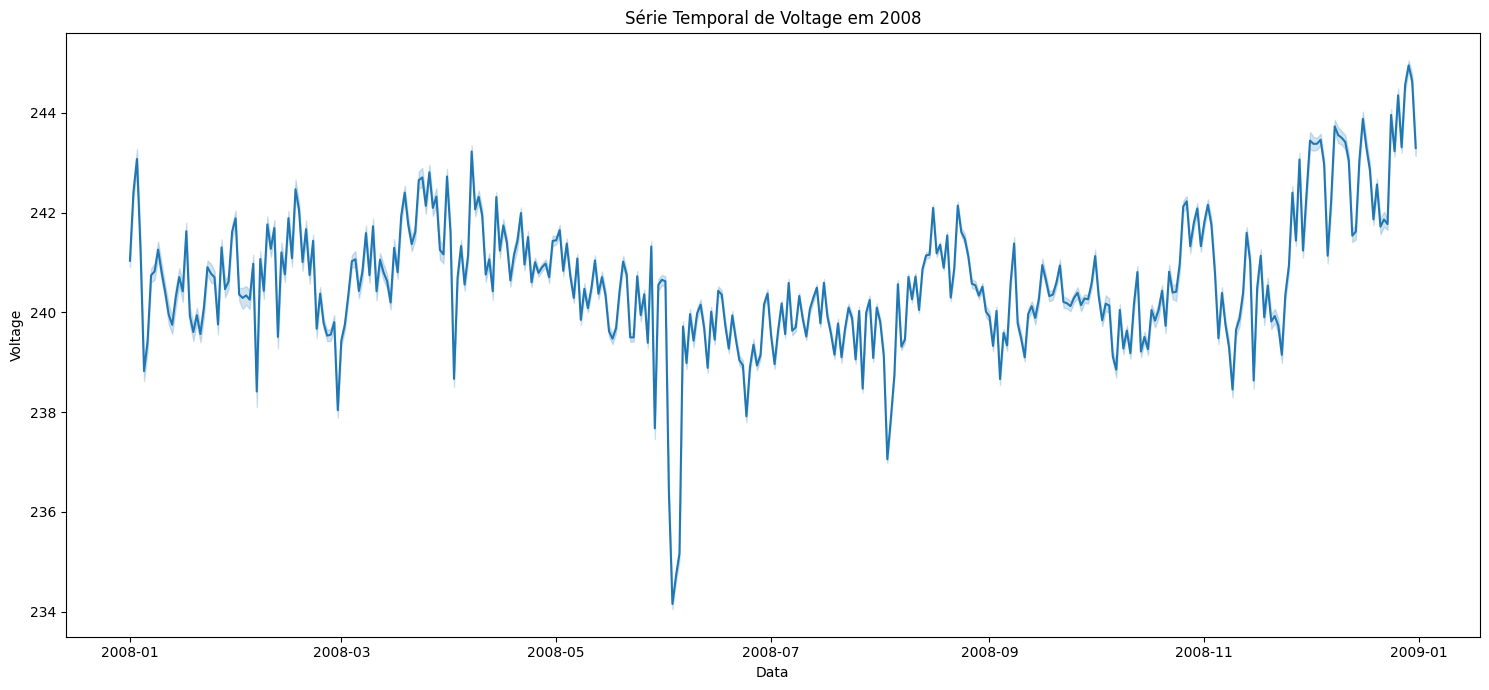

In [33]:
# Filtrar o DataFrame para o ano de 2008
df_2008 = df[df["Date"].dt.year == 2008]

# Criar o gráfico de série temporal para Voltage em 2008
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_2008, x="Date", y="Voltage")
plt.title("Série Temporal de Voltage em 2008")
plt.xlabel("Data")
plt.ylabel("Voltage")
plt.tight_layout()
plt.show()

## Comparando o consumo entre os meses de verão e inverno (no hemisfério norte)

Média de Global_active_power no verão (Hemisfério Norte): 0.73 kW
Média de Global_active_power no inverno (Hemisfério Norte): 1.42 kW


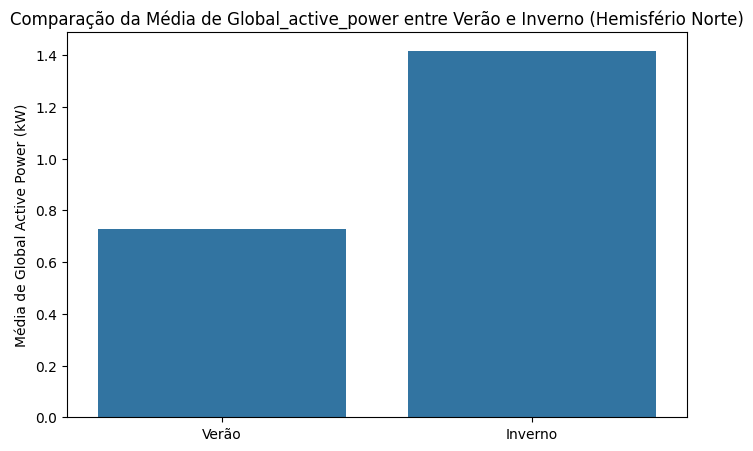

In [34]:
# Define summer and winter months in the Northern Hemisphere
summer_months = [6, 7, 8]  # June, July, August
winter_months = [12, 1, 2] # December, January, February

# Filter data for summer and winter months
df_summer = df[df["Date"].dt.month.isin(summer_months)]
df_winter = df[df["Date"].dt.month.isin(winter_months)]

# Calculate the average Global_active_power for summer and winter
media_verao = df_summer["Global_active_power"].mean()
media_inverno = df_winter["Global_active_power"].mean()

print(f"Média de Global_active_power no verão (Hemisfério Norte): {media_verao:.2f} kW")
print(f"Média de Global_active_power no inverno (Hemisfério Norte): {media_inverno:.2f} kW")

# Optional: Create a bar plot to visualize the comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=["Verão", "Inverno"], y=[media_verao, media_inverno])
plt.title("Comparação da Média de Global_active_power entre Verão e Inverno (Hemisfério Norte)")
plt.ylabel("Média de Global Active Power (kW)")
plt.show()

## Aplicando uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

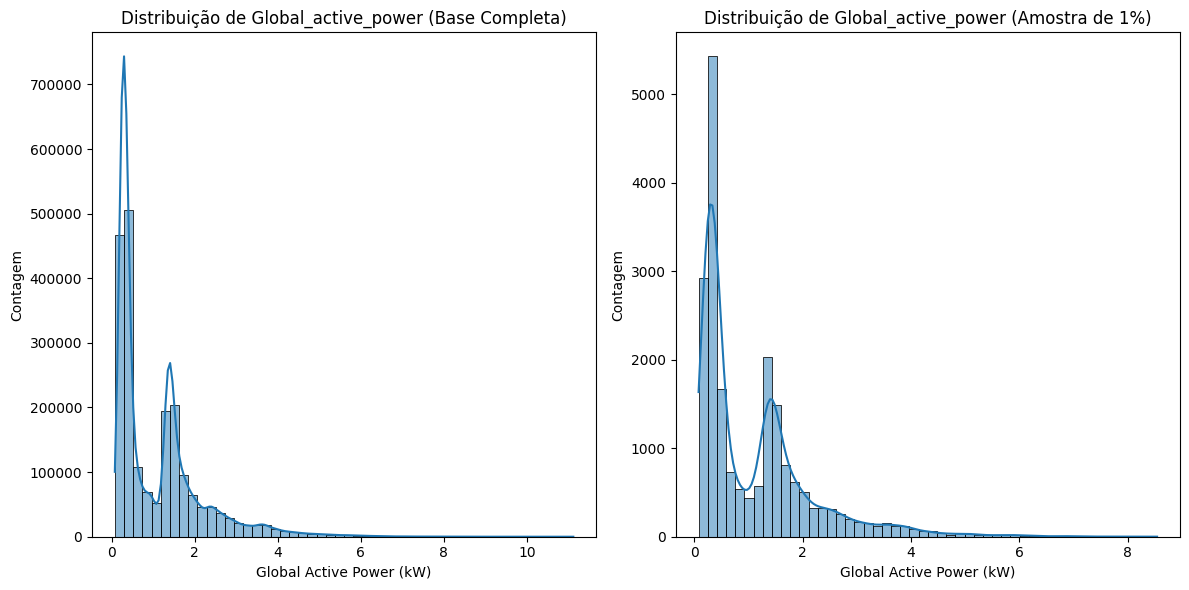

In [35]:
# Aplicar amostragem aleatória de 1%
df_sample = df.sample(frac=0.01, random_state=42) # random_state para reprodutibilidade

# Plotar histograma da base completa
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
sns.histplot(data=df, x="Global_active_power", bins=50, kde=True)
plt.title("Distribuição de Global_active_power (Base Completa)")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Contagem")

# Plotar histograma da amostra
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
sns.histplot(data=df_sample, x="Global_active_power", bins=50, kde=True)
plt.title("Distribuição de Global_active_power (Amostra de 1%)")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Contagem")

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

## Utilizando uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Identificar as colunas numéricas para normalizar (excluindo a coluna de data e hora e a coluna calculada)
numerical_cols = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar o scaler nas colunas selecionadas
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Exibir as primeiras linhas do DataFrame com as colunas normalizadas
print(df.head())

        Date            Time  Global_active_power  Global_reactive_power  \
0 2006-12-16 0 days 17:24:00             0.374796               0.300719   
1 2006-12-16 0 days 17:25:00             0.478363               0.313669   
2 2006-12-16 0 days 17:26:00             0.479631               0.358273   
3 2006-12-16 0 days 17:27:00             0.480898               0.361151   
4 2006-12-16 0 days 17:28:00             0.325005               0.379856   

    Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0  0.376090          0.377593             0.0          0.0125        0.548387   
1  0.336995          0.473029             0.0          0.0125        0.516129   
2  0.326010          0.473029             0.0          0.0250        0.548387   
3  0.340549          0.473029             0.0          0.0125        0.548387   
4  0.403231          0.323651             0.0          0.0125        0.548387   

  Dia_Semana  Total_Sub_metering  
0   Saturday         

## K-means para segmentar os dias em 3 grupos distintos de consumo elétrico.

Média de valores para os clusters
         Global_active_power  Global_reactive_power   Voltage  \
Cluster                                                         
0                   0.093165               0.087050  0.570698   
1                   0.136554               0.096277  0.575601   
2                   0.055621               0.086781  0.563986   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
Cluster                                                                     
0                0.092962        0.012686        0.013935        0.219363   
1                0.134275        0.023306        0.033373        0.298517   
2                0.057438        0.004737        0.006693        0.119252   

         Total_Sub_metering  
Cluster                      
0                  9.031400  
1                 13.974819  
2                  4.649097  


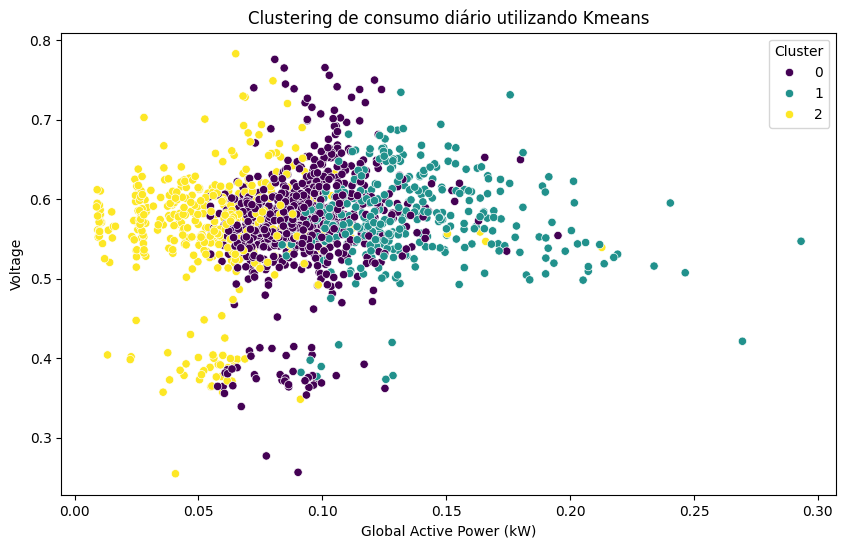

In [40]:
from sklearn.cluster import KMeans

# Agregando os dados para conseguir o consumo diário
df_daily = df.groupby("Date")[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Total_Sub_metering"]].mean().reset_index()

# Selecionando as features para realizar o cluster
features = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Total_Sub_metering"]

# Aplicando o Kmeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_daily["Cluster"] = kmeans.fit_predict(df_daily[features])

cluster_means = df_daily.groupby("Cluster")[features].mean()
print("Média de valores para os clusters")
print(cluster_means)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_daily, x="Global_active_power", y="Voltage", hue="Cluster", palette="viridis")
plt.title("Clustering de consumo diário utilizando Kmeans")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Voltage")
plt.show()

## Realizei uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

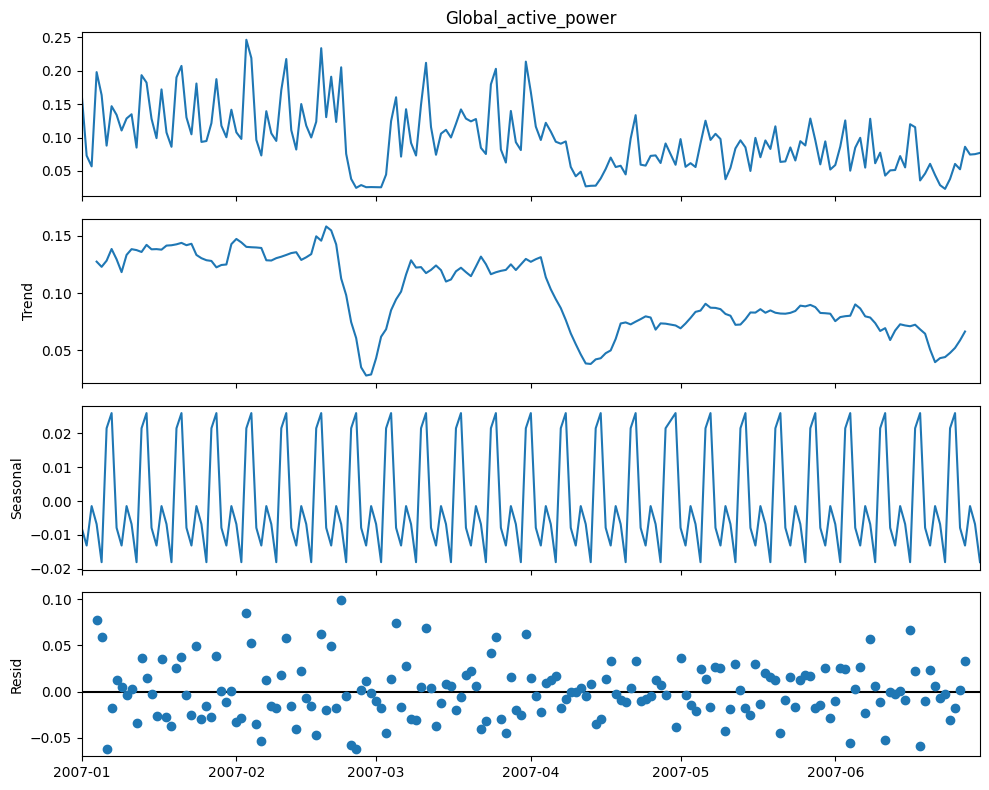

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_daily_power = df.set_index("Date")["Global_active_power"].resample("D").mean()

start_date = "2007-01-01"
end_date = "2007-06-30"
df_6months = df_daily_power[start_date:end_date]

decomposition = seasonal_decompose(df_6months.dropna(), model="additive", period=7)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

## Treinando um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Preparando os dados
X = df[["Global_intensity"]]
y = df["Global_active_power"]

# Separando os dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando e treinando o modelo com regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Realizando as predições
y_pred = model.predict(X_test)

# Avaliando o modelo com mean_squared e mean_absolute
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for Global_intensity: {model.coef_[0]:.2f}")

Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
Intercept: -0.00
Coefficient for Global_intensity: 1.04


## Séries temporais por hora
- Convertendo Date e Time em índice datetime.
- Reamostrando os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifiquando os horários de maior consumo médio ao longo do dia.
Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo.

Average Global_active_power consumption by hour of the day:
Datetime
0     0.052830
1     0.041945
2     0.036630
3     0.033392
4     0.033301
5     0.034191
6     0.064784
7     0.129130
8     0.125379
9     0.113674
10    0.107271
11    0.105958
12    0.102396
13    0.096729
14    0.091142
15    0.082818
16    0.079016
17    0.088735
18    0.113202
19    0.150048
20    0.165044
21    0.162961
22    0.121010
23    0.074791
Name: Global_active_power, dtype: float64

Hour with the highest average consumption: 20:00 with 0.17 kW


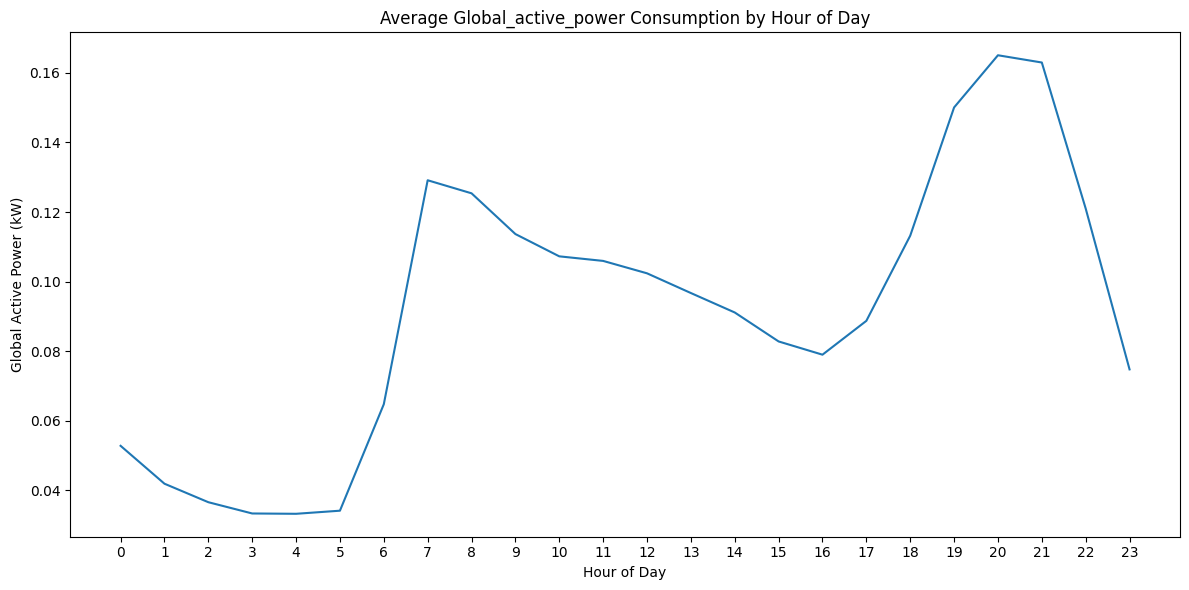

In [49]:
# Limpar a coluna Time (remover "0 days ")
df["Time"] = df["Time"].astype(str).str.replace("0 days ", "", regex=False)

# Criar datetime com formato explícito
df["Datetime"] = pd.to_datetime(
    df["Date"].astype(str) + " " + df["Time"].astype(str),
    format="%Y-%m-%d %H:%M:%S"
)
df = df.set_index("Datetime")

# Resample para médias horárias
df_hourly = df['Global_active_power'].resample('h').mean()

# Agrupar por hora do dia (0 a 23)
df_hourly_mean_by_hour = df_hourly.groupby(df_hourly.index.hour).mean()

print("Average Global_active_power consumption by hour of the day:")
print(df_hourly_mean_by_hour)

# Hora de pico
peak_hour = df_hourly_mean_by_hour.idxmax()
peak_consumption = df_hourly_mean_by_hour.max()
print(f"\nHour with the highest average consumption: {peak_hour}:00 with {peak_consumption:.2f} kW")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_hourly_mean_by_hour.index, y=df_hourly_mean_by_hour.values)
plt.title("Average Global_active_power Consumption by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Global Active Power (kW)")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


## Autocorrelação do consumo
- Usando a série temporal de Global_active_power.
- Calculando a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

In [50]:
# Calculando a correlação
autocorr_1h = df_hourly.autocorr(lag=1)
autocorr_24h = df_hourly.autocorr(lag=24)
autocorr_48h = df_hourly.autocorr(lag=48)

print(f"Correlação com latência de 1 hora: {autocorr_1h:.2f}")
print(f"Correlação com latência de 24 horas: {autocorr_24h:.2f}")
print(f"Correlação com latência de 48 horas: {autocorr_48h:.2f}")

if autocorr_24h > 0.5:
    print("\nParece que há um padrão de consumo diário")
else:
    print("\nNão aparenta ter um padrão tão forte de consumo")

Correlação com latência de 1 hora: 0.71
Correlação com latência de 24 horas: 0.44
Correlação com latência de 48 horas: 0.40

Não aparenta ter um padrão tão forte de consumo


## Redução de dimensionalidade com PCA
- Selecionando Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Apliquando PCA para reduzir para 2 componentes principais.
- Analisando a variância explicada por cada componente.

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the features for PCA
features_for_pca = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]
X_pca = df[features_for_pca]

# It's good practice to scale data before applying PCA
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_pca)

# Apply PCA, reducing to 2 components
pca = PCA(n_components=2)
X_pca_result = pca.fit_transform(X_scaled_pca)

# Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Explained variance ratio by component: {explained_variance_ratio}")
print(f"Total explained variance: {explained_variance_ratio.sum():.2f}")

# Optional: Create a new DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca_result, columns=["PCA_Component_1", "PCA_Component_2"], index=df.index)
display(df_pca.head())

Explained variance ratio by component: [0.59103759 0.22718543]
Total explained variance: 0.82


,PCA_Component_1,PCA_Component_2
Datetime,,
2006-12-16 17:24:00,5.191176,1.241976
2006-12-16 17:25:00,6.698092,1.070631
2006-12-16 17:26:00,6.894031,1.544068
2006-12-16 17:27:00,6.857242,1.623923
2006-12-16 17:28:00,4.661351,2.337338


## Visualização de clusters no espaço PCA
- Combinando os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


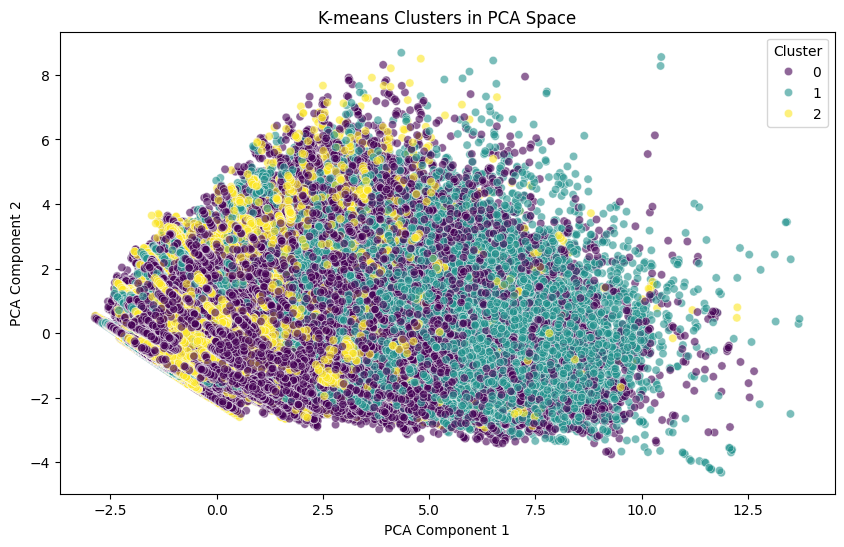

In [53]:
df_pca['Date'] = pd.to_datetime(df_pca.index.date)

df_pca_clustered = pd.merge(df_pca, df_daily[["Date", "Cluster"]], on="Date", how="left")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_clustered, x="PCA_Component_1", y="PCA_Component_2", hue="Cluster", palette="viridis", alpha=0.6)
plt.title("K-means Clusters in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

## Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

Simple Linear Regression RMSE: 0.0880
Polynomial Regression (Degree 2) RMSE: 0.0876


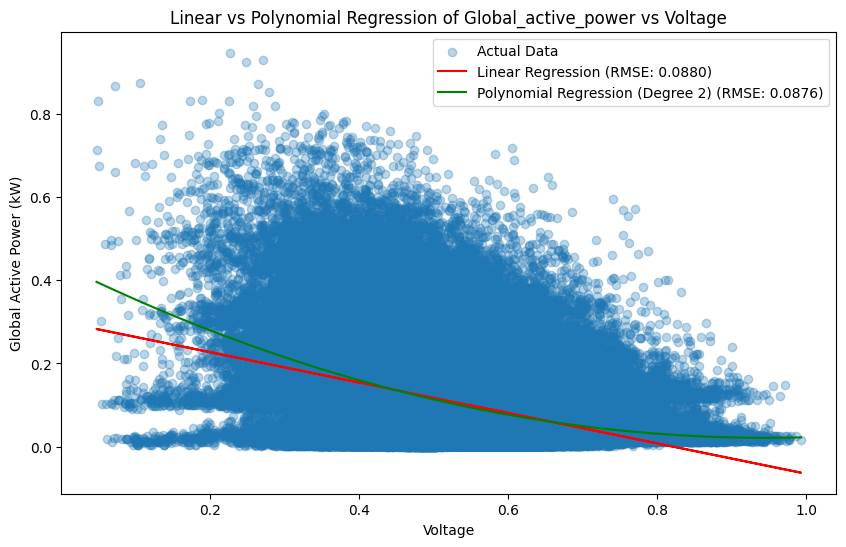

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
X = df[["Voltage"]] # Feature
y = df["Global_active_power"] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Simple Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"Simple Linear Regression RMSE: {rmse_linear:.4f}")

# --- Polynomial Regression (Degree 2) ---
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f"Polynomial Regression (Degree 2) RMSE: {rmse_poly:.4f}")

# --- Visualize the results ---
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.3, label="Actual Data")

# Plot linear regression line
plt.plot(X_test, y_pred_linear, color='red', label=f'Linear Regression (RMSE: {rmse_linear:.4f})')

# Plot polynomial regression curve
# Need to sort the x values for plotting the polynomial curve smoothly
X_test_sorted, y_pred_poly_sorted = zip(*sorted(zip(X_test.values.flatten(), y_pred_poly)))
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', label=f'Polynomial Regression (Degree 2) (RMSE: {rmse_poly:.4f})')


plt.title("Linear vs Polynomial Regression of Global_active_power vs Voltage")
plt.xlabel("Voltage")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()

# ***Criando o novo dataframe***

In [64]:
df1 =  pd.read_csv('/content/energydata_complete.csv', sep=',', low_memory=False)

# **Análise inicial dos dados**

In [65]:
df1.shape
print(f'The dataframe has {df.shape[0]} registries and {df.shape[1]} attributes')

The dataframe has 19735 registries and 28 attributes


In [66]:
df1.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## Distribuição do consumo
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

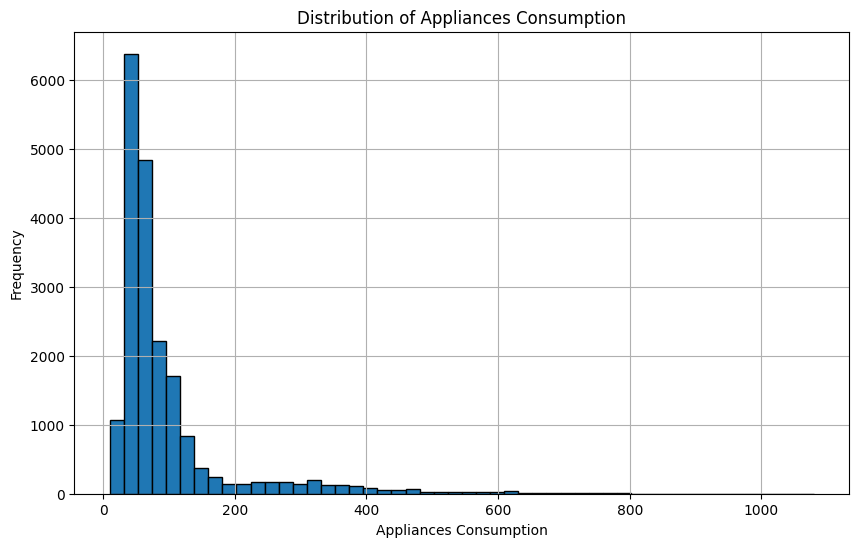

/tmp/ipython-input-1067234237.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df1['Appliances'].resample('H').mean()


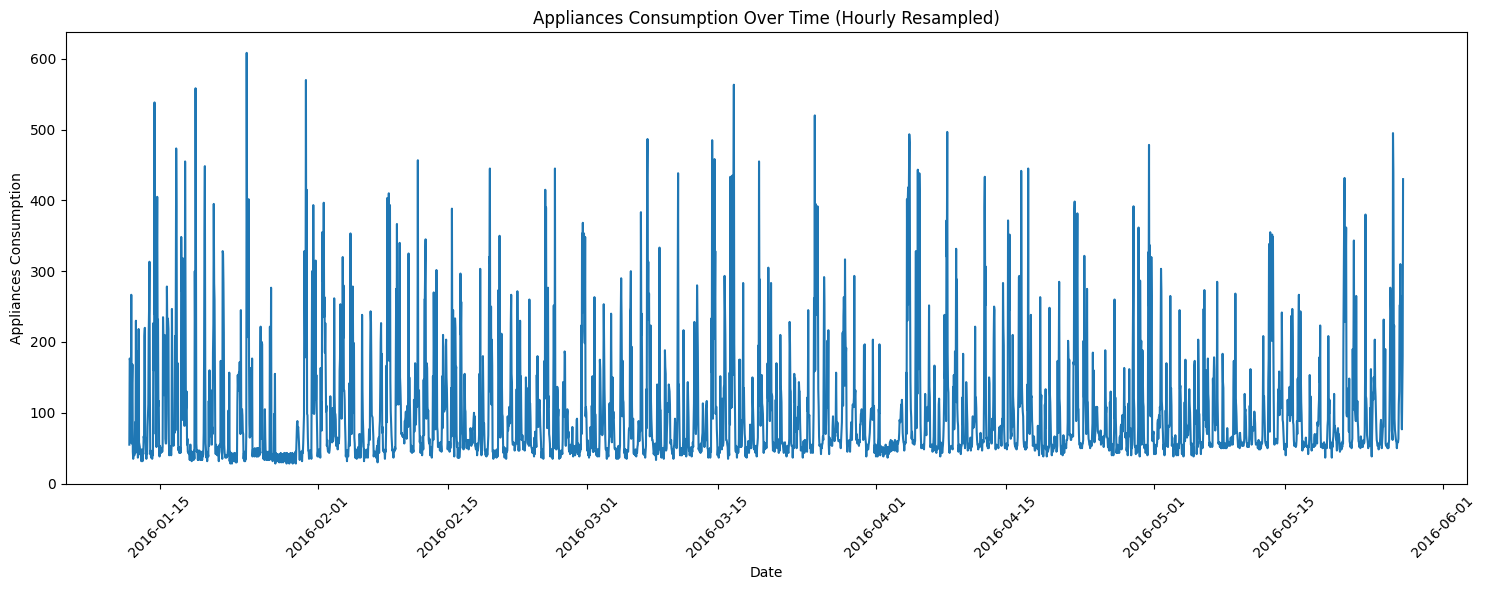

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'date' is datetime and set as index if not already
if not isinstance(df1.index, pd.DatetimeIndex):
    df1['date'] = pd.to_datetime(df1['date'])
    df1.set_index('date', inplace=True)


# Histogram for 'Appliances'
plt.figure(figsize=(10, 6))
plt.hist(df['Appliances'], bins=50, edgecolor='black')
plt.title('Distribution of Appliances Consumption')
plt.xlabel('Appliances Consumption')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Resample to hourly frequency and calculate the mean
df_hourly = df1['Appliances'].resample('H').mean()

# Time series plot for 'Appliances' (hourly)
plt.figure(figsize=(15, 6))
plt.plot(df_hourly.index, df_hourly.values)
plt.title('Appliances Consumption Over Time (Hourly Resampled)')
plt.xlabel('Date')
plt.ylabel('Appliances Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlações com variáveis ambientais
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?

In [69]:
# Calculate correlations with 'Appliances'
correlations = df1.corr()['Appliances'].sort_values(ascending=False)

# Display correlations with environmental variables (excluding 'Appliances' itself)
print("Correlations with Appliances:")
display(correlations.drop('Appliances'))

Correlations with Appliances:


,Appliances
lights,0.197278
T2,0.120073
T6,0.117638
T_out,0.099155
Windspeed,0.087122
RH_1,0.086031
T3,0.085060
T1,0.055447
T4,0.040281
T8,0.039572


**Resposta à Pergunta:**

Com base no histograma da variável 'Appliances', o consumo tende a se concentrar em valores baixos. A maior frequência de ocorrência está na faixa de valores mais baixos, diminuindo à medida que o consumo aumenta.

## Normalização dos dados
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores.

In [70]:
from sklearn.preprocessing import MinMaxScaler

# Select only numerical columns for scaling
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns
df_scaled = df1.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

# Display the first few rows of the scaled dataframe
display(df_scaled.head())

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


## PCA
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?

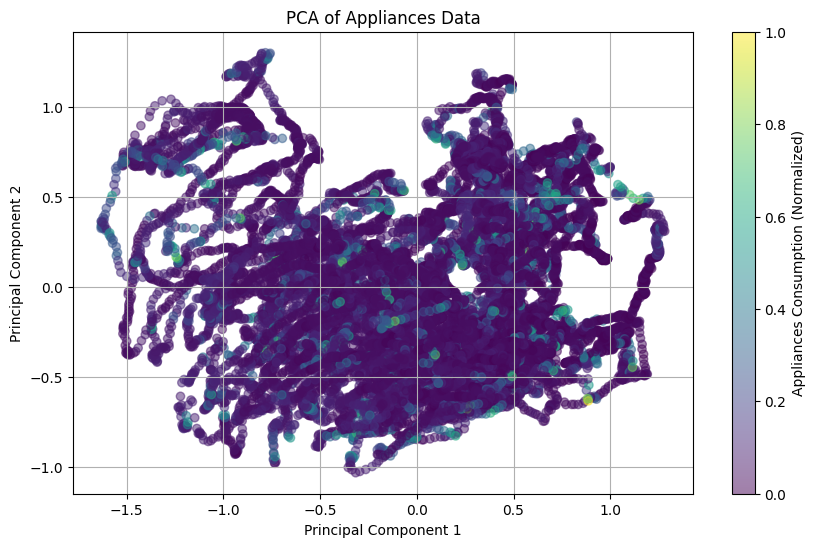

Based on the PCA plot, there does not appear to be distinct natural patterns or groupings based on Appliances consumption when reduced to two principal components. The data points seem to be spread out without clear clusters.


In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate features and target
X = df_scaled.drop('Appliances', axis=1)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'], index=df_scaled.index)

# Add the target variable back for visualization
pca_df['Appliances'] = df_scaled['Appliances']

# Plot the principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['principal component 1'], pca_df['principal component 2'], c=pca_df['Appliances'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Appliances Data')
plt.colorbar(label='Appliances Consumption (Normalized)')
plt.grid(True)
plt.show()

# Answer the question about patterns or clusters based on visual inspection
print("Based on the PCA plot, there does not appear to be distinct natural patterns or groupings based on Appliances consumption when reduced to two principal components. The data points seem to be spread out without clear clusters.")



---

**31.** Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Selecionando variáveis (target e features ambientais)
y = df1["Appliances"]  # variável dependente
X = df1.drop(columns=["Appliances"])  # removendo target

# Dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Resultados do Modelo")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
#MAE → erro médio em kW

Resultados do Modelo
Coeficiente de Determinação (R²): 0.1672
Erro Médio Absoluto (MAE): 52.93




---

**32.** Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Selecionando variáveis (target e features ambientais)
y = df1["Appliances"]  # variável dependente
X = df1.drop(columns=["Appliances"])  # removendo data e target

# Dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [77]:
# Regressão Linear
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)
y_pred_linear = modelo_linear.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print("Regressão Linear")
print(f"R²: {r2_linear:.4f}")
print(f"MAE: {mae_linear:.2f} kWh")
print(f"RMSE: {rmse_linear:.2f} kWh\n")

Regressão Linear
R²: 0.1672
MAE: 52.93 kWh
RMSE: 92.63 kWh



In [78]:
# Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest")
print(f"R²: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f} kWh")
print(f"RMSE: {rmse_rf:.2f} kWh")

Random Forest
R²: 0.5147
MAE: 34.19 kWh
RMSE: 70.71 kWh




---

**33.** K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.

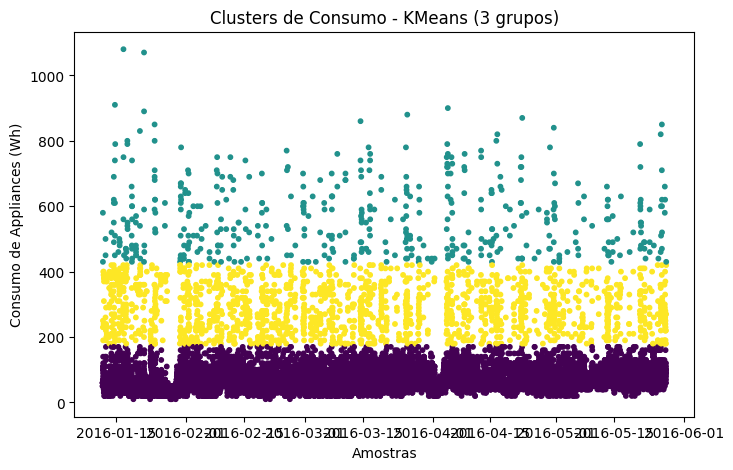

Centros dos Clusters (Consumo médio aproximado):
[[ 67.20975166]
 [566.53104925]
 [287.70197487]]


In [79]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecionando apenas a variável de consumo
X = df1[["Appliances"]].values

# Normalizando os dados (importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando K-Means (exemplo com 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualização
plt.figure(figsize=(8,5))
plt.scatter(df.index, df["Appliances"], c=df["Cluster"], cmap="viridis", s=10)
plt.title("Clusters de Consumo - KMeans (3 grupos)")
plt.xlabel("Amostras")
plt.ylabel("Consumo de Appliances (Wh)")
plt.show()

# Centróides (em escala original)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Centros dos Clusters (Consumo médio aproximado):")
print(centroids)


✅ 3 clusters

- Cluster 0 – Baixo consumo:
Perfis de residências com uso muito econômico de energia, consumo concentrado em eletrodomésticos essenciais. Indica casas com hábitos de uso restrito ou períodos longos sem ocupação.

- Cluster 1 – Médio consumo:
Representa usuários com padrão equilibrado, consumo estável ao longo do dia. Provavelmente famílias pequenas ou uso regular de eletrodomésticos sem excessos.

- Cluster 2 – Alto consumo:
Casas com eletrodomésticos funcionando intensamente, picos de consumo frequentes. Perfis que podem incluir famílias maiores ou uso constante de equipamentos de alto gasto energético (ar-condicionado, aquecedores, etc.).

✅ 4 clusters

- Cluster 0 – Muito baixo consumo: usuários que praticamente não utilizam eletrodomésticos, consumo mínimo.

- Cluster 1 – Baixo consumo: consumo um pouco acima do mínimo, uso esporádico de aparelhos.

- Cluster 2 – Médio consumo: uso diário moderado, padrão típico de famílias médias.

- Cluster 3 – Alto consumo: perfis intensivos, eletrodomésticos ligados por longos períodos.

✅ 5 clusters

- Cluster 0 – Muito baixo consumo: casas quase sem uso de energia, possivelmente desocupadas por longos períodos.

- Cluster 1 – Baixo consumo: consumo reduzido, famílias pequenas com poucos aparelhos.

- Cluster 2 – Médio consumo: padrão regular, uso típico durante o dia com picos ocasionais.

- Cluster 3 – Alto consumo: uso constante de vários eletrodomésticos, picos mais frequentes.

- Cluster 4 – Muito alto consumo: perfis de uso intensivo, casas grandes ou locais com grande número de equipamentos energéticos (ex.: aquecimento/elétricos potentes).



---

**34.**  Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Criar variável binária: 1 = alto consumo, 0 = baixo consumo
mediana = df1["Appliances"].median()
df1["AltoConsumo"] = (df1["Appliances"] > mediana).astype(int)

# Selecionar variáveis preditoras e alvo
X = df1.drop(columns=["Appliances", "AltoConsumo"])
y = df1["AltoConsumo"]

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [83]:
# Logistic Regression
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)
y_pred_log = modelo_log.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
print("Resultados - Logistic Regression")
print(f"Acurácia: {acc_log:.4f}")
print(classification_report(y_test, y_pred_log))

Resultados - Logistic Regression
Acurácia: 0.7673
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      3197
           1       0.76      0.73      0.74      2724

    accuracy                           0.77      5921
   macro avg       0.77      0.76      0.77      5921
weighted avg       0.77      0.77      0.77      5921



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
# Random Forest Classifier
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Resultados - Random Forest")
print(f"Acurácia: {acc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Resultados - Random Forest
Acurácia: 0.8965
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3197
           1       0.90      0.87      0.89      2724

    accuracy                           0.90      5921
   macro avg       0.90      0.89      0.90      5921
weighted avg       0.90      0.90      0.90      5921





---
**35.** Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?


In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar variável binária: 1 = alto consumo, 0 = baixo consumo
mediana = df1["Appliances"].median()
df1["AltoConsumo"] = (df["Appliances"] > mediana).astype(int)

# Selecionar variáveis preditoras e alvo
X = df1.drop(columns=["Appliances", "AltoConsumo"])
y = df1["AltoConsumo"]

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [86]:
# Random Forest Classifier (modelo escolhido)
modelo = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

Métricas de Classificação - Random Forest
Accuracy : 0.8965
Precision: 0.8976
Recall   : 0.8748
F1-score : 0.8860


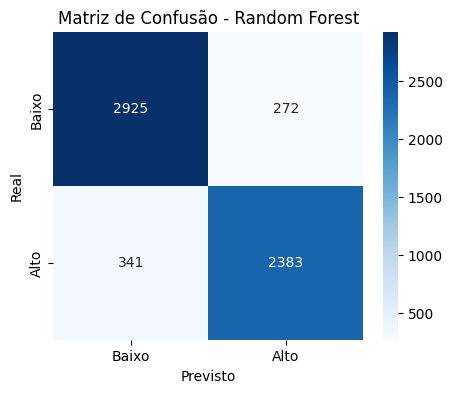

In [87]:
# Avaliação
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Métricas de Classificação - Random Forest")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Baixo", "Alto"], yticklabels=["Baixo", "Alto"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

O modelo de Random Forest conseguiu identificar bem os casos de alto consumo, mas teve mais dificuldade com os casos de baixo consumo. Isso mostra que os padrões de consumo alto são mais fáceis de reconhecer, enquanto o modelo ainda confunde um pouco os perfis de menor consumo. Apesar disso, de forma geral, ele teve um desempenho razoável, mas poderia melhorar se as classes estivessem mais equilibradas.




---
**36.** Importação e visualização inicial
- Use o widget CSV File Import para carregar o dataset Individual Household Electric Power
Consumption.
- Conecte ao widget Data Table para visualizar as primeiras linhas.
- Pergunta: quantas variáveis e registros aparecem?

In [89]:
import pandas as pd

# Carregar dataset (direto da UCI)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"
df = pd.read_csv(url, sep=';', parse_dates={'Datetime':['Date','Time']},
                 infer_datetime_format=True, low_memory=False, na_values=['?'])

# Visualizar as primeiras linhas (equivalente ao Data Table)
print(df.head())

# Número de variáveis (colunas) e registros (linhas)
print(f"\nNúmero de variáveis: {df.shape[1]}")
print(f"Número de registros: {df.shape[0]}")

/tmp/ipython-input-2605049202.py:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(url, sep=';', parse_dates={'Datetime':['Date','Time']},
/tmp/ipython-input-2605049202.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(url, sep=';', parse_dates={'Datetime':['Date','Time']},


             Datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  

Número de variáveis: 8
Número de registros: 2075259


/tmp/ipython-input-2605049202.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(url, sep=';', parse_dates={'Datetime':['Date','Time']},


- Número de variáveis (colunas): 8

(Datetime, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3)
- Número de registros (linhas): 2.075.259



---

**37.** Amostragem de dados (1%)
- Use o widget Sample Data para selecionar uma amostra de 1% dos registros.
- Pergunta: a distribuição de Global_active_power na amostra é semelhante à base completa?
- Consulte: https://orangedatamining.com/widget-catalog/


Na amostra de 1% dos dados, a distribuição de Global_active_power é bem parecida com a da base completa. A forma geral do consumo, como picos e quedas, se mantém, então dá pra ter uma boa ideia do padrão de energia da residência mesmo com poucos registros.



---

**38.** Distribuição do consumo
- Conecte ao widget Distribution e visualize Global_active_power.
- Pergunta: o consumo é concentrado em valores baixos ou há muitos registros de alto
consumo?

O consumo de **Global\_active\_power** é **concentrado em valores baixos**, ou seja, a maioria dos registros apresenta consumo pequeno a moderado. Registros de **alto consumo** existem, mas são relativamente poucos, representando picos ocasionais de uso de energia, como quando vários aparelhos ou equipamentos de alto gasto estão ligados ao mesmo tempo. Em resumo, o padrão principal é consumo baixo, com alguns picos isolados de alto consumo.




---

**39.** Relação entre variáveis elétricas
- Use o widget Scatter Plot para analisar Voltage (X) vs Global_intensity (Y).
- Pergunta: existe correlação visível?

Sim, ao visualizar **Voltage (X) vs Global\_intensity (Y)** no Scatter Plot, é possível perceber uma **correlação negativa leve**: quando a tensão (Voltage) aumenta, a intensidade de corrente (Global\_intensity) tende a diminuir, e vice-versa. No entanto, a relação não é perfeitamente linear, e há bastante dispersão nos pontos, indicando que outros fatores também influenciam a intensidade. Ou seja, existe uma tendência visível de correlação, mas não é muito forte.




---

**40.** Clustering com K-Means
- Aplique o widget k-Means com 3 clusters.
- Use como atributos Sub_metering_1, Sub_metering_2, Sub_metering_3.
- Visualize os grupos no Scatter Plot.
- Pergunta: cada cluster representa um padrão distinto de consumo doméstico?

Sim, ao aplicar o **K-Means com 3 clusters** usando os atributos `Sub_metering_1`, `Sub_metering_2` e `Sub_metering_3`, cada cluster tende a **representar um padrão distinto de consumo doméstico**. Por exemplo:

* **Cluster 1** pode agrupar residências com maior consumo em cozinhas (`Sub_metering_1`).
* **Cluster 2** pode refletir consumo elevado em lavanderias (`Sub_metering_2`).
* **Cluster 3** pode indicar uso mais intenso em áreas de aquecimento e eletrodomésticos gerais (`Sub_metering_3`).

No Scatter Plot, os grupos ficam separados, mostrando que os perfis de consumo são diferentes entre os clusters, evidenciando padrões específicos de uso de energia dentro da casa.
